In [31]:
% some housekeeping stuff
register_graphics_toolkit("gnuplot");
available_graphics_toolkits();
graphics_toolkit("gnuplot")
clear
% end of housekeeping

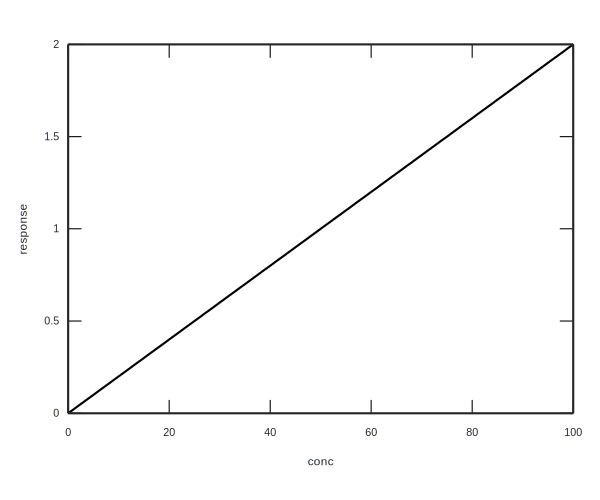

In [32]:
%plot -s 600,500 -f 'svg'
% start by showing the "true" instrument response.

slope = 0.02;  conc=0:1:100;

response = slope*conc;

plot(conc,response,'k','linewidth',2)
set(gca,'linewidth',2)
xlabel('conc'); ylabel('response')


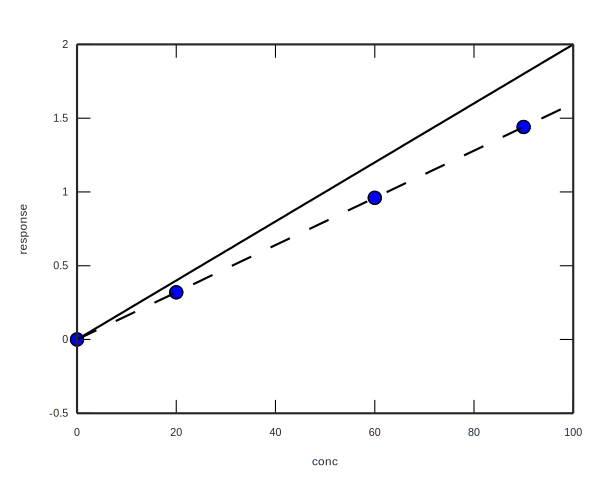

In [33]:
%plot -s 600,500 -f 'svg'
%now prepare 4 calibration samples with -20% error
%so response corresponds to solutions with lower concentration then
%our targets

targetconc=[0 20 60 90];
trueconc=0.8*targetconc; % 20% too low

calibresponse = slope*trueconc;

plot(conc,response,'k','linewidth',2)
set(gca,'linewidth',2)
xlabel('conc'); ylabel('response')
hold on
plot(targetconc,calibresponse,'ko','markersize',4,'markerfacecolor','b')

% fit that line
param=polyfit(targetconc,calibresponse,1); fit=polyval(param,conc);
biasslope=param(1);  
plot(conc,fit,'k--','linewidth',2)


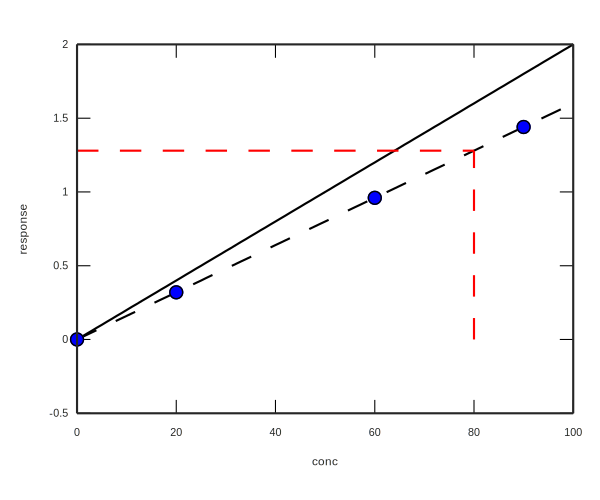

In [34]:
%plot -s 600,500 -f 'svg'
% now a spike. use 80.  let's see if we get back what we thought

spiketarget=80; spiketrue=0.8*spiketarget;  Rspike=slope*spiketrue;

plot(conc,response,'k','linewidth',2)
set(gca,'linewidth',2)
xlabel('conc'); ylabel('response')
hold on
plot(conc,fit,'k--','linewidth',2)
plot(targetconc,calibresponse,'ko','markersize',4,'markerfacecolor','b')
plot([spiketarget spiketarget],[0 Rspike],'r--','linewidth',2)
plot([0 spiketarget],[Rspike Rspike],'r--','linewidth',2)

% recover the known value.  think everythign is fine.


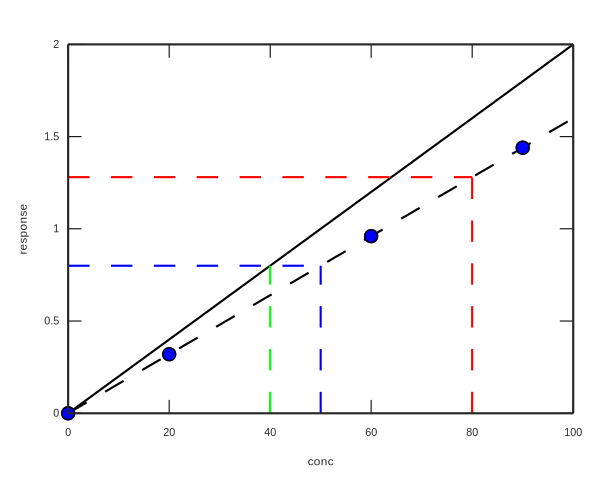

In [35]:
%plot -s 600,500 -f 'svg'
%now run a known sample that is 40.  what do we recover.

SRM=40; RSRM=slope*SRM;
biasconcSRM=RSRM/biasslope;

plot(conc,response,'k','linewidth',2)
set(gca,'linewidth',2)
xlabel('conc'); ylabel('response')
hold on
plot(conc,fit,'k--','linewidth',2)
plot(targetconc,calibresponse,'ko','markersize',4,'markerfacecolor','b')
plot([spiketarget spiketarget],[0 Rspike],'r--','linewidth',2)
plot([0 spiketarget],[Rspike Rspike],'r--','linewidth',2)
plot([biasconcSRM biasconcSRM],[0 RSRM],'b--','linewidth',2)
plot([0 biasconcSRM],[RSRM RSRM],'b--','linewidth',2)
plot([SRM SRM],[0 RSRM],'g--','linewidth',2)
axis([0 100 0 2])
